In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Files\\telco_chrun_encoded.csv")
df=df.sample(frac=0.25,random_state=3)

In [57]:
df.head(2)

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
5571,0,0,0,0,48,1,0,0,0,0,...,1004.50,0,20.927083,0,1,1,0,0,0,0
3432,0,0,1,0,18,1,1,0,0,0,...,1687.95,1,93.775000,1,0,0,0,0,1,0


In [58]:
df.columns

Index(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'avg_monthly_charges', 'internet_service-fiber_optic',
       'internet_service-no', 'contract-one_year', 'contract-two_year',
       'payment_method-credit_card_auto', 'payment_method-electronic_check',
       'payment_method-mailed_check'],
      dtype='object')

In [59]:
df['churn'].value_counts()

0    1318
1     440
Name: churn, dtype: int64

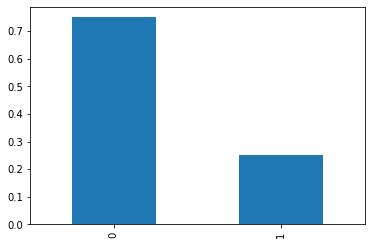

In [60]:

df['churn'].value_counts(normalize=True).plot(kind='bar')

In [61]:
df.isnull().sum()

gender                             0
senior                             0
partner                            0
dependents                         0
tenure                             0
phone_service                      0
multiple_lines                     0
online_security                    0
online_backup                      0
device_protection                  0
tech_support                       0
streaming_tv                       0
streaming_movies                   0
paperless_billing                  0
monthly_charges                    0
total_charges                      0
churn                              0
avg_monthly_charges                0
internet_service-fiber_optic       0
internet_service-no                0
contract-one_year                  0
contract-two_year                  0
payment_method-credit_card_auto    0
payment_method-electronic_check    0
payment_method-mailed_check        0
dtype: int64

In [62]:
df=df.sample(frac=1,random_state=3)
y=df['churn']
X=df.drop('churn',axis=1)

# Building predictive algoritm using random Forest

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [64]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(X)
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [65]:
# Here we are telling the model to create 100 decision tress and make random forest and calculated the score etc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
# Create 100 decision trees to form randon Forest
rfc=RandomForestClassifier(n_estimators=100)

In [66]:
rfc.fit(X_trains,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_train_predict=rfc.predict(X_trains)
y_train_prob=rfc.predict_proba(X_trains)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))

Overall Accuracy -Train 1.0
Confusion matrix-Train 
 [[912   0]
 [  0 318]]
AUC - Train 1.0


In [68]:
y_test_pred=rfc.predict(X_tests)
y_test_prob=rfc.predict_proba(X_tests)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

Overall Accuracy -Test 0.7992424242424242
Confusion matrix-Test 
 [[374  32]
 [ 74  48]]
AUC - Test 0.818894855850763


Text(0, 0.5, 'TPR')

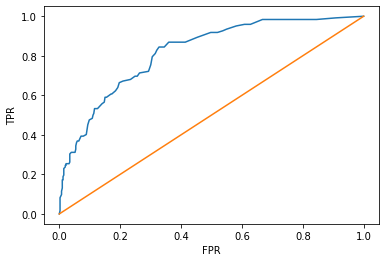

In [69]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [70]:
## HYperparameter tuning of Random Forest
# #Here we are telling to  select the best features and thn will create randomforest and and th remove auc ,score etc

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfc=RandomForestClassifier(random_state=3)
params={'n_estimators':sp_randint(50,200),
        'max_features':sp_randint(1,24),
        'max_depth':sp_randint(2,10),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20),
        'criterion':['gini','entropy']
}
rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=50,cv=3,scoring='roc_auc',random_state=3,return_train_score=True)
rsearch_rfc.fit(Xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [72]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 16,
 'n_estimators': 126}

In [73]:
# combinations that he took so as to find the best parameters
rsearch_rfc.cv_results_

{'mean_fit_time': array([0.06195339, 0.39893548, 0.3009088 , 0.3593092 , 0.20793867,
        0.25513657, 0.08330433, 0.07291079, 0.11456776, 0.37491727,
        0.38533783, 0.1509939 , 0.18225654, 0.16661485, 0.22391343,
        0.11456688, 0.24005938, 0.15101544, 0.51028291, 0.15100511,
        0.15101671, 0.22391391, 0.14582658, 0.20306635, 0.32805713,
        0.20307612, 0.1926523 , 0.19408441, 0.20311308, 0.39736263,
        0.17393883, 0.1457808 , 0.05207117, 0.19265358, 0.12495844,
        0.08853173, 0.20310362, 0.1926651 , 0.30199917, 0.18745716,
        0.29161739, 0.37489223, 0.14580909, 0.25515469, 0.27597022,
        0.24994477, 0.13539942, 0.12497973, 0.35236359, 0.11453048]),
 'std_fit_time': array([7.48925353e-04, 4.71891313e-02, 2.29751503e-02, 2.20652773e-02,
        6.80554288e-03, 7.37217278e-03, 7.36834264e-03, 7.34720784e-03,
        7.38159910e-03, 1.17237958e-05, 7.34754440e-03, 7.35419097e-03,
        7.33065748e-03, 7.38047515e-03, 7.39998524e-03, 7.37985710e-0

In [74]:
pd.DataFrame(rsearch_rfc.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.061953,0.000749,0.015649,0.000019,gini,2,4,9,2,71,...,0.820193,0.860391,0.839695,0.016432,20,0.851891,0.863141,0.847861,0.854298,0.006466
1,0.398935,0.047189,0.021382,0.008144,entropy,5,11,12,11,188,...,0.825686,0.857776,0.842070,0.013109,13,0.891880,0.896644,0.884538,0.891021,0.004980


In [75]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [76]:
rfc.fit(X_trains,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=126,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
y_train_predict=rfc.predict(X_trains)
y_train_prob=rfc.predict_proba(X_trains)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))

Overall Accuracy -Train 0.8219512195121951
Confusion matrix-Train 
 [[886  26]
 [193 125]]
AUC - Train 0.9134271902239876


In [78]:
y_test_pred=rfc.predict(X_tests)
y_test_prob=rfc.predict_proba(X_tests)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

Overall Accuracy -Test 0.8125
Confusion matrix-Test 
 [[395  11]
 [ 88  34]]
AUC - Test 0.8400428006137446


Text(0, 0.5, 'TPR')

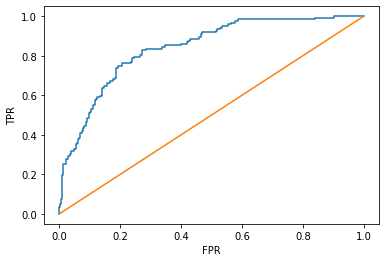

In [79]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [80]:
# important features
imp=pd.DataFrame(rfc.feature_importances_,index=X_train.columns,columns=['imp'])
imp=imp.sort_values(by='imp',ascending=False)
imp

,imp
tenure,0.148404
monthly_charges,0.107593
total_charges,0.091647
avg_monthly_charges,0.089773
contract-two_year,0.088882
internet_service-fiber_optic,0.058317
payment_method-electronic_check,0.051313
tech_support,0.039230
internet_service-no,0.033479
online_security,0.031443


In [81]:
# Suppose if we happen to drop the tenture feature the performance of model will drop with 16%

# K-NN algorithm

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn=KNeighborsClassifier()
params={'n_neighbors':sp_randint(1,20),
        'p':sp_randint(1,5)
       }
rsearch_knn=RandomizedSearchCV(knn,param_distributions=params,cv=3,return_train_score=True,n_iter=50,random_state=3)
rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025EDAA2D4C8>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025EDAA2D208>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [83]:
rsearch_knn.best_params_

{'n_neighbors': 15, 'p': 2}

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
knn=KNeighborsClassifier(**rsearch_knn.best_params_)
knn.fit(X_trains,y_train)

y_train_predict=knn.predict(X_trains)
y_train_prob=knn.predict_proba(X_trains)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print("Cassification Report-Test",classification_report(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=knn.predict(X_tests)
y_test_prob=knn.predict_proba(X_tests)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print("Cassification Report-Test",'\n',classification_report(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

Overall Accuracy -Train 0.8146341463414634
Confusion matrix-Train 
 [[807 105]
 [123 195]]
Cassification Report-Test               precision    recall  f1-score   support

           0       0.87      0.88      0.88       912
           1       0.65      0.61      0.63       318

    accuracy                           0.81      1230
   macro avg       0.76      0.75      0.75      1230
weighted avg       0.81      0.81      0.81      1230

AUC - Train 0.8689227490897053
Overall Accuracy -Test 0.8068181818181818
Confusion matrix-Test 
 [[355  51]
 [ 51  71]]
Cassification Report-Test 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       406
           1       0.58      0.58      0.58       122

    accuracy                           0.81       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.81      0.81      0.81       528

AUC - Test 0.8169163369135104


Text(0, 0.5, 'TPR')

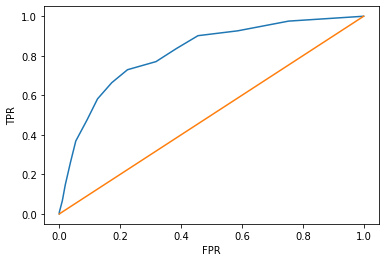

In [85]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

# Stacking Results of 3 learners(Random forest,KNN,logistic regression)

In [86]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')

lr.fit(X_trains,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Overall Accuracy -Train 0.8105691056910569
Confusion matrix-Train 
 [[827  85]
 [148 170]]
Cassification Report-Test               precision    recall  f1-score   support

           0       0.85      0.91      0.88       912
           1       0.67      0.53      0.59       318

    accuracy                           0.81      1230
   macro avg       0.76      0.72      0.73      1230
weighted avg       0.80      0.81      0.80      1230

AUC - Train 0.8557665783956746
Overall Accuracy -Test 0.8087121212121212
Confusion matrix-Test 
 [[367  39]
 [ 62  60]]
Cassification Report-Test 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       406
           1       0.61      0.49      0.54       122

    accuracy                           0.81       528
   macro avg       0.73      0.70      0.71       528
weighted avg       0.80      0.81      0.80       528

AUC - Test 0.842344343050957


Text(0, 0.5, 'TPR')

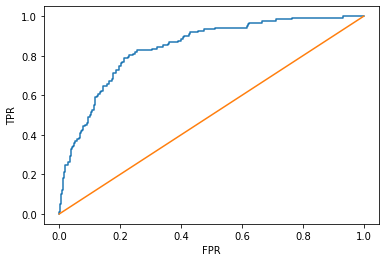

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

y_train_predict=lr.predict(X_trains)
y_train_prob=lr.predict_proba(X_trains)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print("Cassification Report-Test",classification_report(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=lr.predict(X_tests)
y_test_prob=lr.predict_proba(X_tests)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print("Cassification Report-Test",'\n',classification_report(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [95]:
##Hard voting

In [96]:
from sklearn.ensemble import VotingClassifier
lr=LogisticRegression(solver='liblinear')
knn=KNeighborsClassifier(**rsearch_knn.best_params_)
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)


In [97]:
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],voting='hard')
clf.fit(X_trains,y_train)
y_train_pred=clf.predict(X_trains)
y_test_predt=clf.predict(X_tests)

print('Accuracy score-Train',accuracy_score(y_train,y_train_pred))
print('Accuracy score-Test',accuracy_score(y_test,y_test_pred))


Accuracy score-Train 0.8170731707317073
Accuracy score-Test 0.8087121212121212


In [98]:
##SOFT voting

Overall Accuracy -Train 0.824390243902439
Confusion matrix-Train 
 [[843  69]
 [147 171]]
Cassification Report-Test               precision    recall  f1-score   support

           0       0.85      0.92      0.89       912
           1       0.71      0.54      0.61       318

    accuracy                           0.82      1230
   macro avg       0.78      0.73      0.75      1230
weighted avg       0.82      0.82      0.82      1230

AUC - Train 0.8853201202692265
------------------------------------------------------------------
Overall Accuracy -Test 0.8087121212121212
Confusion matrix-Test 
 [[370  36]
 [ 65  57]]
Cassification Report-Test 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       406
           1       0.61      0.47      0.53       122

    accuracy                           0.81       528
   macro avg       0.73      0.69      0.71       528
weighted avg       0.80      0.81      0.80       528

AUC - Test 0.83

Text(0, 0.5, 'TPR')

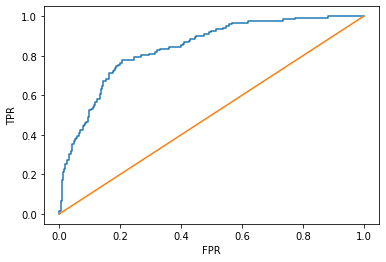

In [104]:
##Equal weightages
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],voting='soft')
clf.fit(X_trains,y_train)

y_train_predict=clf.predict(X_trains)
y_train_prob=clf.predict_proba(X_trains)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print("Cassification Report-Test",classification_report(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))
print("------------------------------------------------------------------")
y_test_pred=clf.predict(X_tests)
y_test_prob=clf.predict_proba(X_tests)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print("Cassification Report-Test",'\n',classification_report(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Overall Accuracy -Train 0.8292682926829268
Confusion matrix-Train 
 [[854  58]
 [152 166]]
Cassification Report-Test               precision    recall  f1-score   support

           0       0.85      0.94      0.89       912
           1       0.74      0.52      0.61       318

    accuracy                           0.83      1230
   macro avg       0.79      0.73      0.75      1230
weighted avg       0.82      0.83      0.82      1230

AUC - Train 0.8926748869027916
------------------------------------------------------------------
Overall Accuracy -Test 0.8087121212121212
Confusion matrix-Test 
 [[374  32]
 [ 69  53]]
Cassification Report-Test 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       406
           1       0.62      0.43      0.51       122

    accuracy                           0.81       528
   macro avg       0.73      0.68      0.70       528
weighted avg       0.79      0.81      0.80       528

AUC - Test 0.8

Text(0, 0.5, 'TPR')

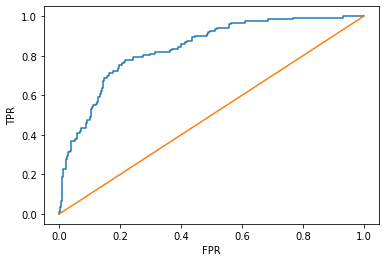

In [108]:
##different weightages
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],voting='soft',weights=[1,2,3])
clf.fit(X_trains,y_train)

y_train_predict=clf.predict(X_trains)
y_train_prob=clf.predict_proba(X_trains)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print("Cassification Report-Test",classification_report(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))
print("------------------------------------------------------------------")
y_test_pred=clf.predict(X_tests)
y_test_prob=clf.predict_proba(X_tests)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print("Cassification Report-Test",'\n',classification_report(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')